# TIME SERIES ANALYSIS
# Goal: Find outliers, trends and periodicity in the MTA turnstile data

In [423]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as stats
%pylab inline
plt.style.use('ggplot')
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
MTAdata=np.load("MTA_Fare.npy")

In [4]:
MTAdata.shape
## 600 manhattan stations
## 23 types of card
## 194 weeks

(600, 23, 194)

In [5]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [6]:
MTAdata

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [7]:
MTAdata = MTAdata.astype('float')
# np.nan is float, cannot replace int array
MTAdata[ MTAdata == -1] = np.nan

In [8]:
MTAdata

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [9]:
time = pd.date_range(start = '20100521', end = "20140221", freq = 'W')
time

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-15', '2013-12-22', '2013-12-29', '2014-01-05',
               '2014-01-12', '2014-01-19', '2014-01-26', '2014-02-02',
               '2014-02-09', '2014-02-16'],
              dtype='datetime64[ns]', length=196, freq='W-SUN')

In [10]:
all_cards = np.nansum( MTAdata , axis = 1)
all_cards

array([[ 126878.,  149477.,  152383., ...,   78901.,   74591.,   76833.],
       [  37306.,   46464.,   49359., ...,       0.,       0.,       0.],
       [   6606.,    6881.,    7229., ...,    8171.,    7907.,    6790.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [11]:
all_cards.shape

(600, 194)

In [12]:
time

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-15', '2013-12-22', '2013-12-29', '2014-01-05',
               '2014-01-12', '2014-01-19', '2014-01-26', '2014-02-02',
               '2014-02-09', '2014-02-16'],
              dtype='datetime64[ns]', length=196, freq='W-SUN')

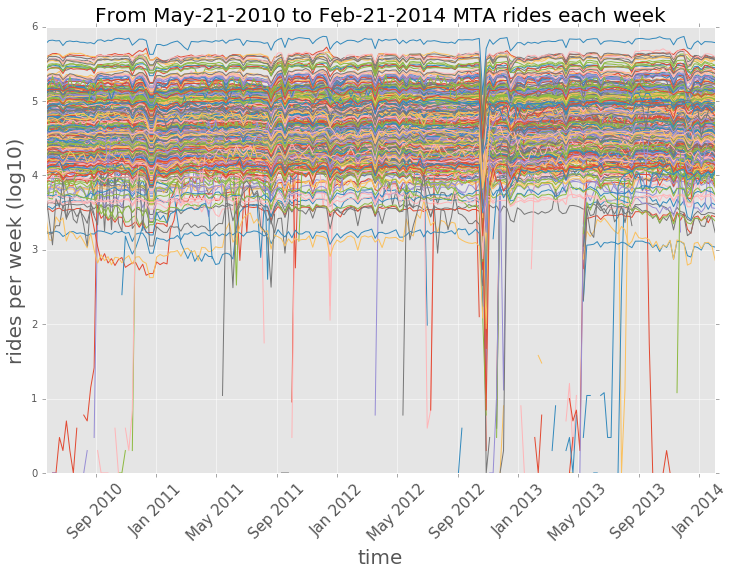

In [13]:
pl.figure(figsize = (12,8))
for i in range(600):
    pl.plot( time[:194], np.log10(all_cards[i])) 
plt.xlabel('time', fontsize = 20)
plt.ylabel('rides per week (log10)', fontsize = 20)
plt.xticks(rotation=45,fontsize = 15)
plt.title('From May-21-2010 to Feb-21-2014 MTA rides each week',fontsize = 20)
plt.show()

### TASK 1: FIND OUT WHAT HAPPENED IN OUTLIER RIDES

In [14]:
each_week = np.nansum(all_cards, axis = 0)
each_week.shape

(194,)

In [41]:
mean = each_week.mean()
sigma = each_week.std()

In [69]:
outlier = np.where( each_week < ( mean- 3 * sigma) )
outlier

(array([126]),)

In [70]:
each_week[outlier]

array([ 5218686.])

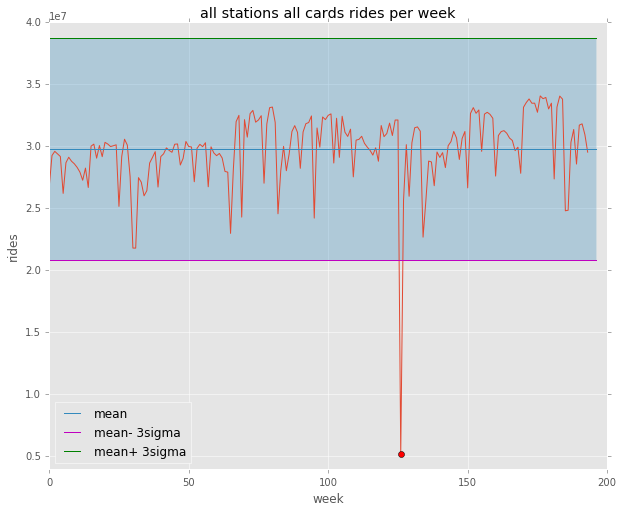

In [93]:
pl.figure(figsize = (10,8))
pl.plot`(each_week)
pl.plot([0,196],[mean,mean], label = 'mean' )
pl.plot([0,196],[mean - 3 * sigma ,mean - 3 * sigma], c = 'm' ,label = 'mean- 3sigma')
pl.plot([0,196],[mean + 3 * sigma ,mean + 3 * sigma], c = 'g', label = 'mean+ 3sigma')
plt.fill_between([0,196],mean - 3 * sigma,mean + 3 * sigma , alpha = 0.3)
pl.plot(outlier,each_week[outlier], 'ro')
pl.xlabel('week')
pl.ylabel('rides')
pl.legend(loc = 3)
ylim(ymin= 0.4e7)
pl.title('all stations all cards rides per week')

In [104]:
time[outlier]

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)

http://www.cnn.com/2013/07/13/world/americas/hurricane-sandy-fast-facts/

### wow! October 22-29, 2012 - Hurricane Sandy
😯

### Task 2 find out what kind of ridership is increasing what is decreasing

In [105]:
each_card = np.nansum( MTAdata , axis = 0)
#each_card = np.nansum( each_card , axis = 0)
each_card.shape

(23, 194)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


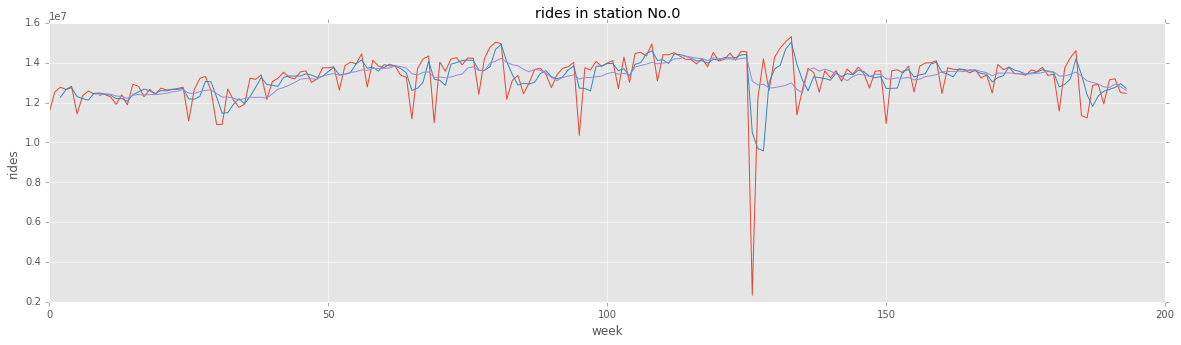

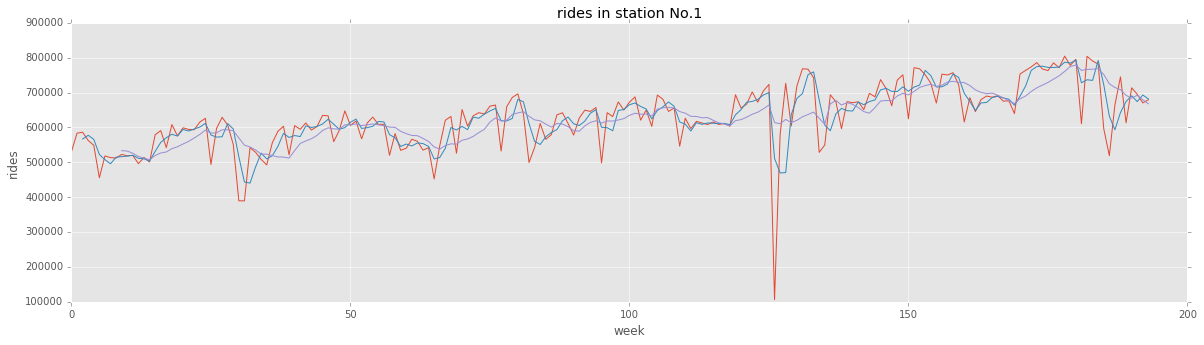

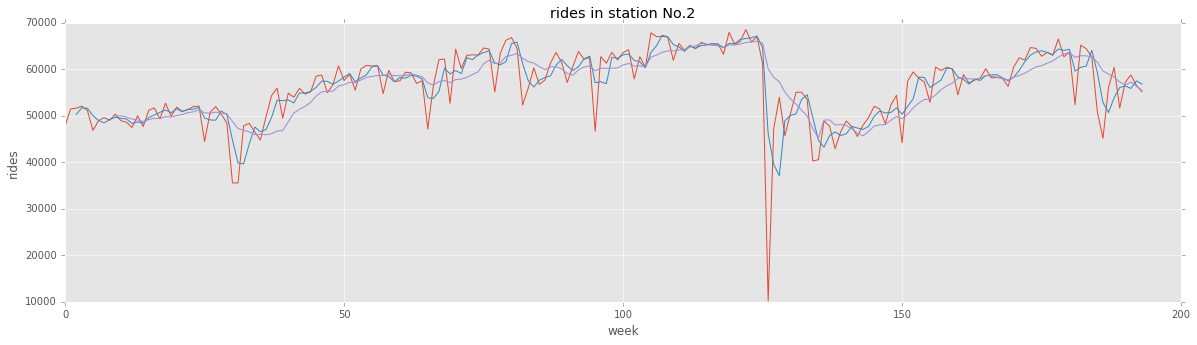

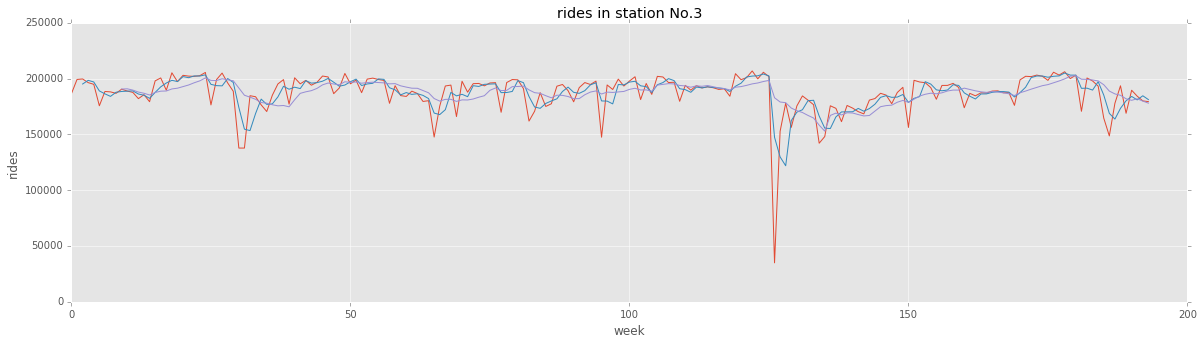

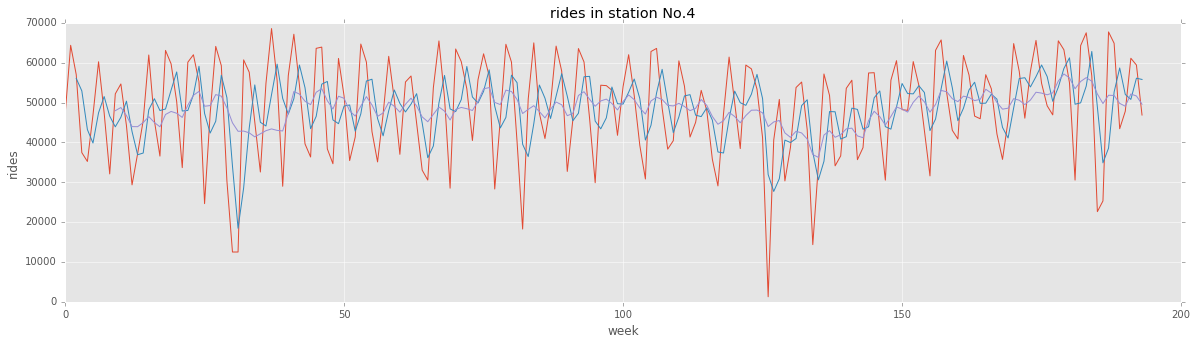

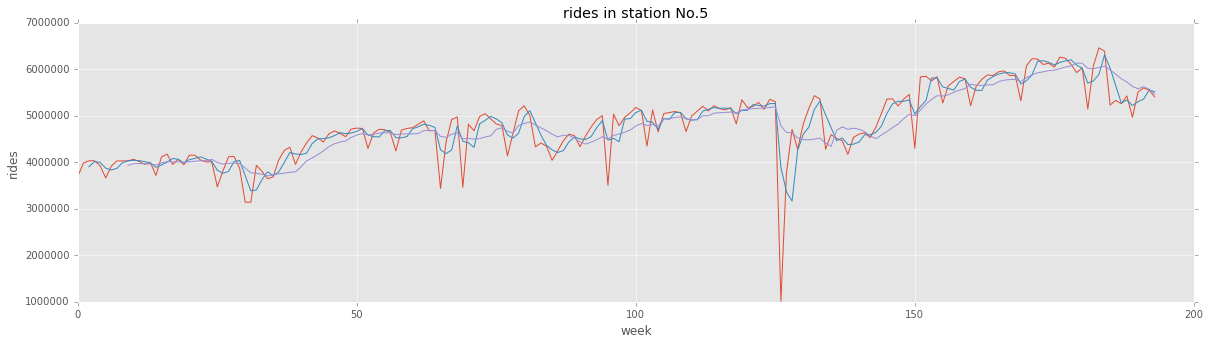

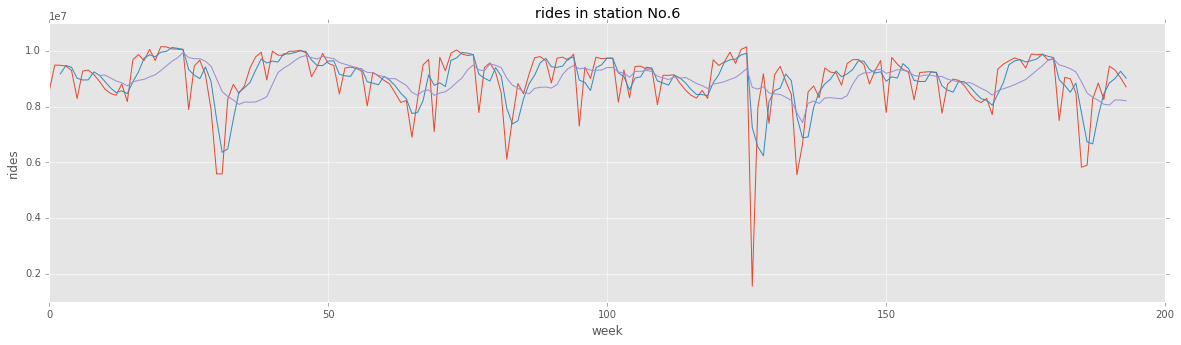

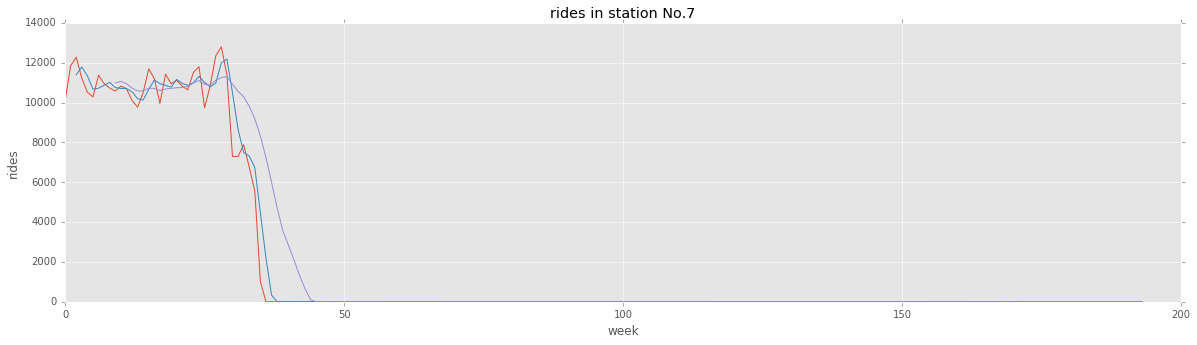

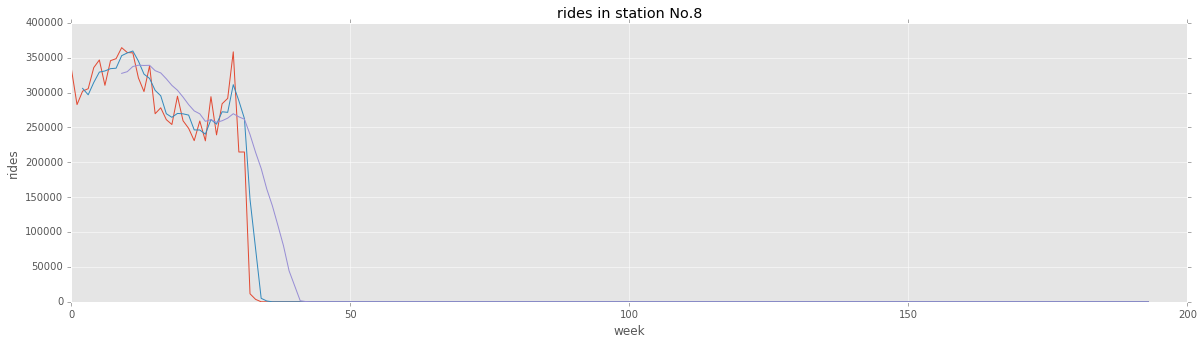

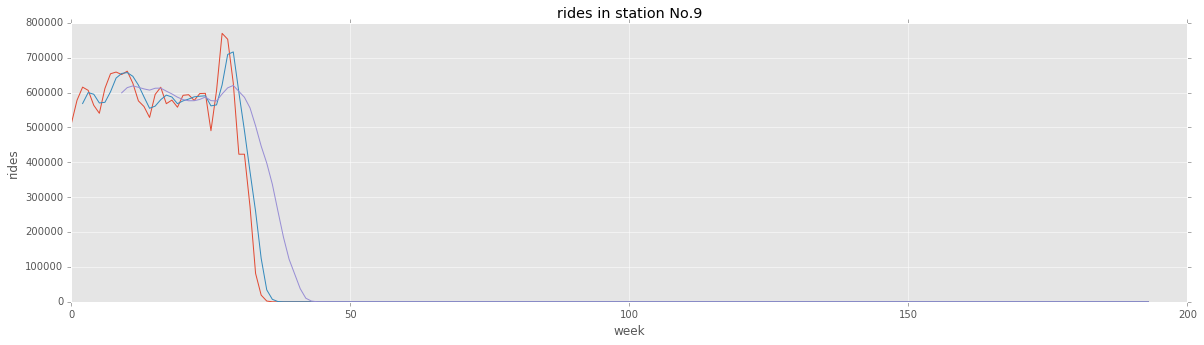

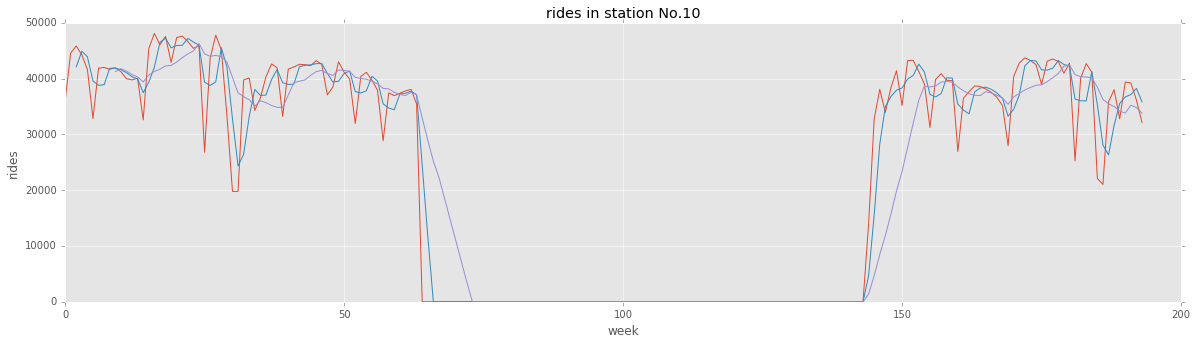

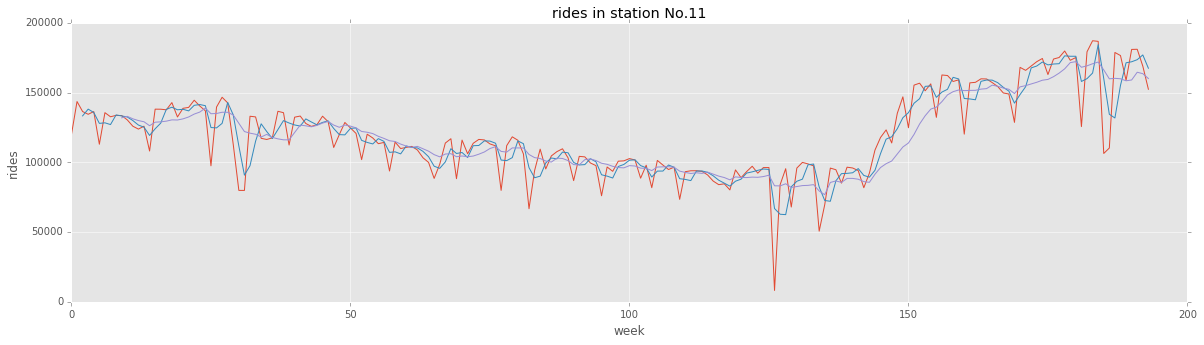

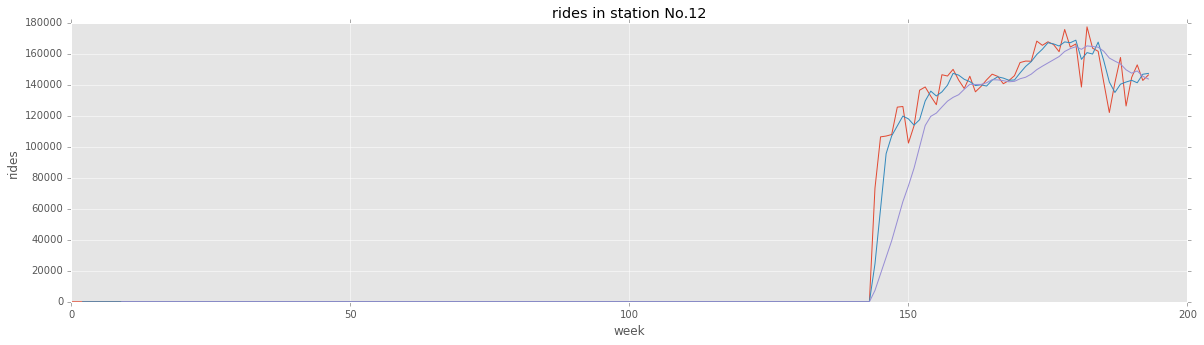

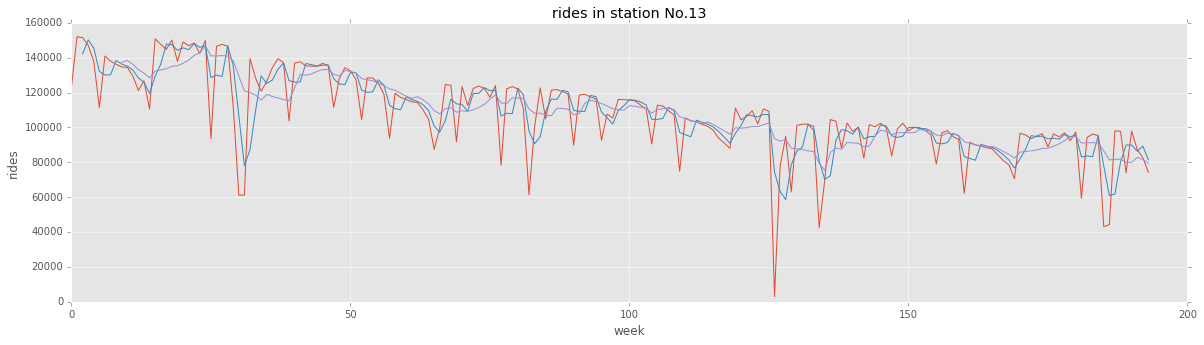

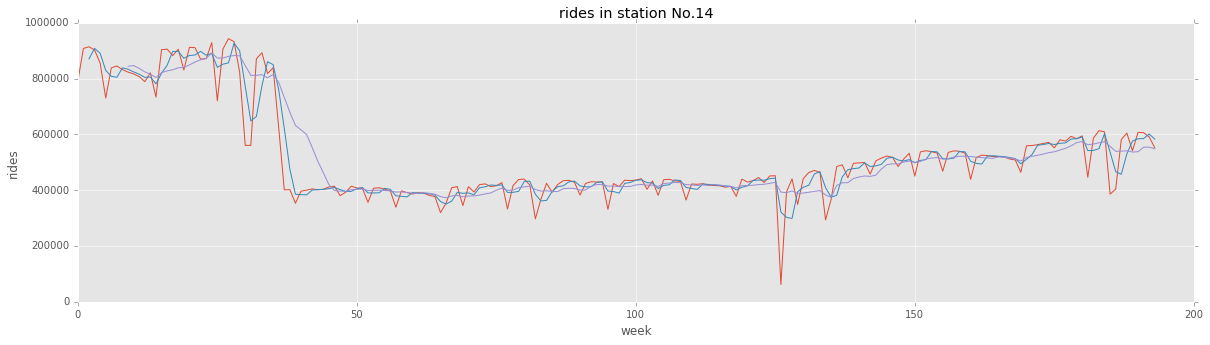

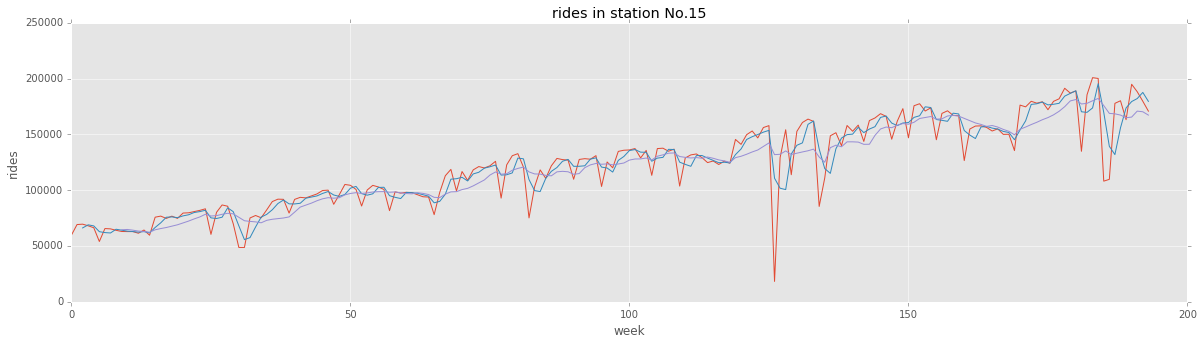

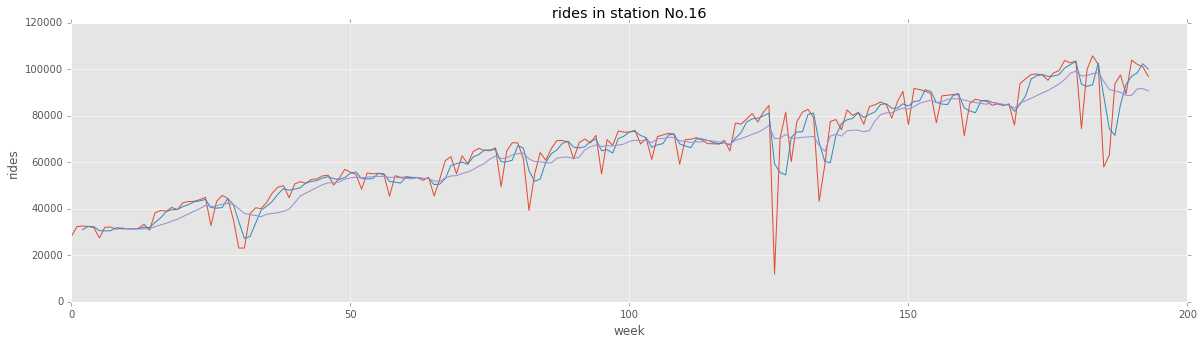

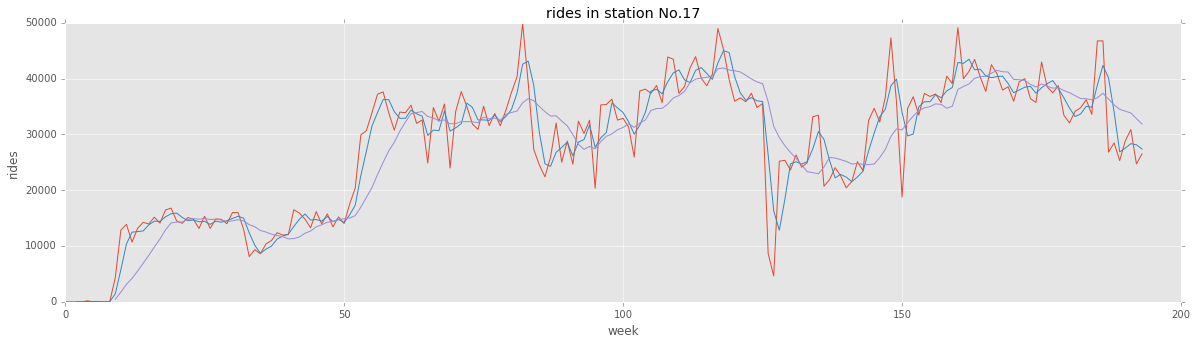

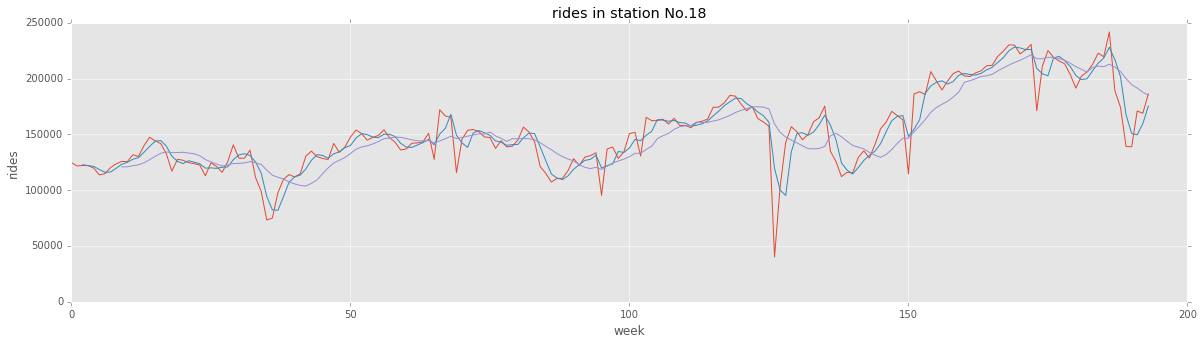

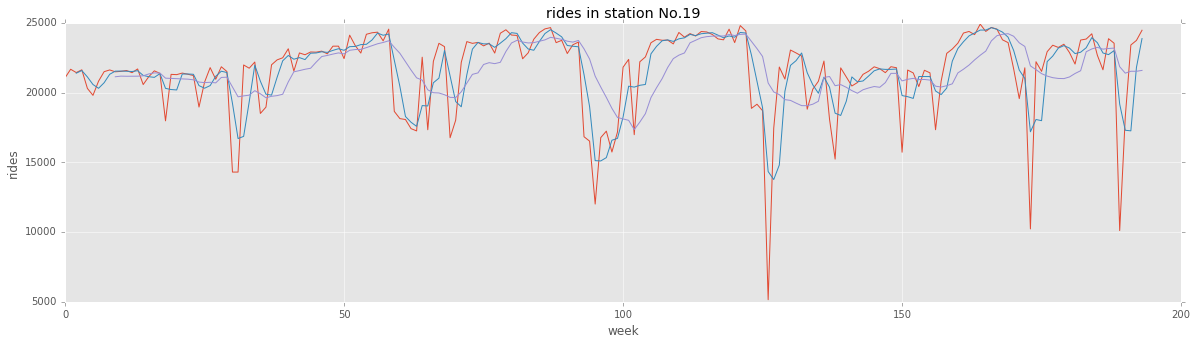

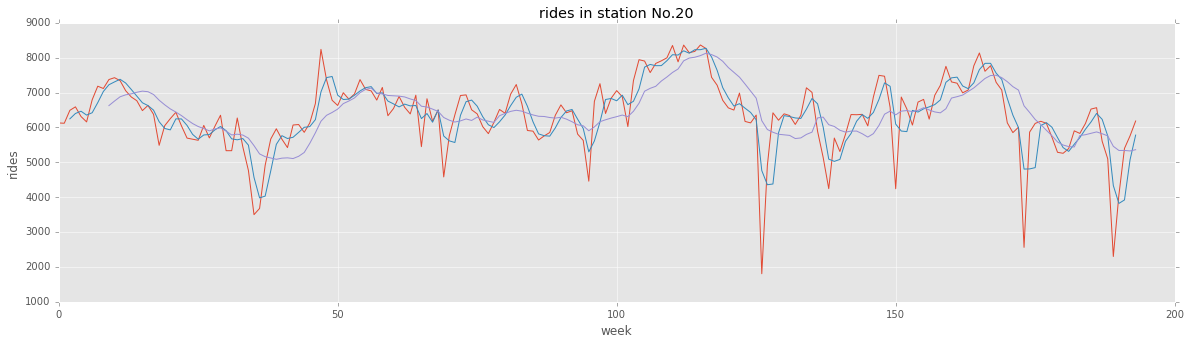

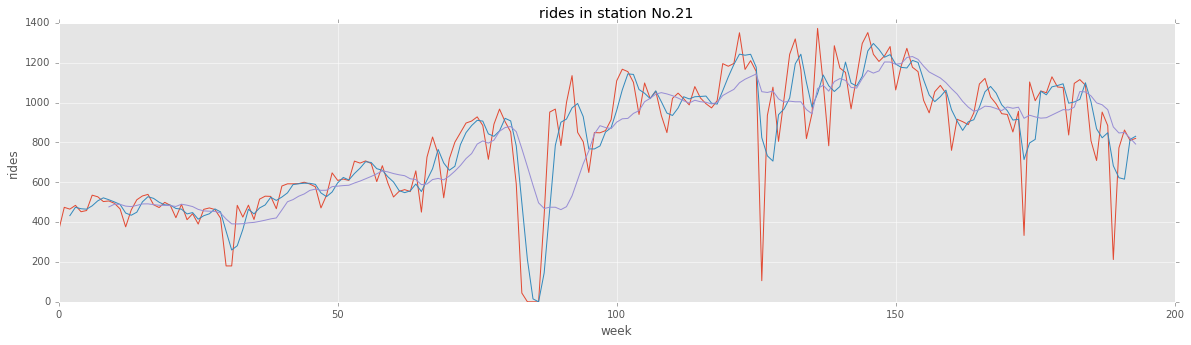

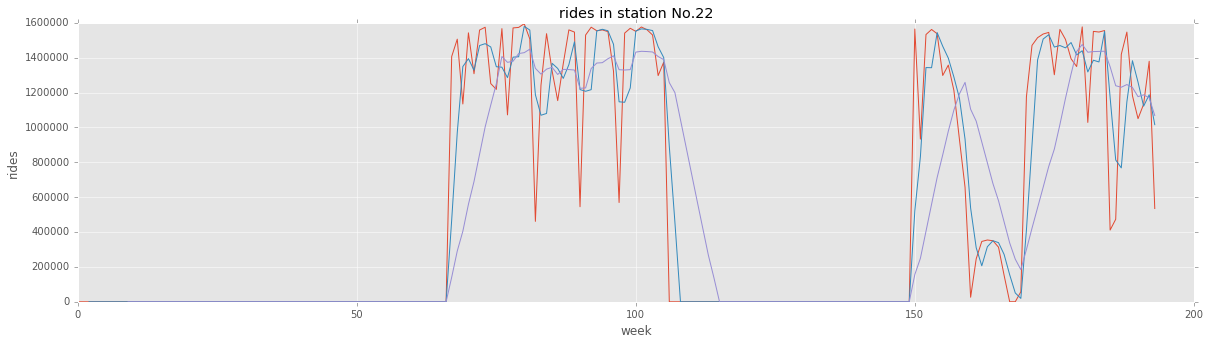

In [107]:
j=0
for i in each_card:
    pl.figure(figsize=(20,5))
    pl.plot( i )
    pl.plot( pd.rolling_mean(i,3) )
    pl.plot( pd.rolling_mean(i,10) )
    plt.xlabel('week')
    plt.ylabel('rides')
    pl.title('rides in station No.%d' %j )
    j += 1

In [108]:
steady_increase = [1, 5 ,15 ,16 ,18]
steady_decrease = [13]

In [ ]:
each_card[]

In [384]:
each_card.shape

(23, 194)

In [389]:
for i in steady_increase :
    ratio = 100 *  (each_card[i][:10].mean() - each_card[i][-10:].mean()) / each_card[i][:10].mean()
    print'increasing popularity:', ridetype[i] ,' , increasing ratio,' , -ratio , '%'

for i in steady_decrease :
    ratio = 100 *  (each_card[i][:10].mean() - each_card[i][-10:].mean()) / each_card[i][:10].mean()
    print'decreasing popularity:', ridetype[i] , ' , decreasing ratio,' , ratio , '%'

increasing popularity: 14d  , increasing ratio, 25.2065052771 %
increasing popularity: 7d  , increasing ratio, 38.9747603617 %
increasing popularity: rr  , increasing ratio, 159.295988592 %
increasing popularity: sen  , increasing ratio, 190.939676884 %
increasing popularity: tcmc  , increasing ratio, 53.2271062695 %
decreasing popularity: month  , decreasing ratio, 42.1277615436 %


14d ,7 d, rail road, Senior citizen/ disable, transit check metrocard is increasing,
month card is decreasing

### TASK 3 find periodic pattern

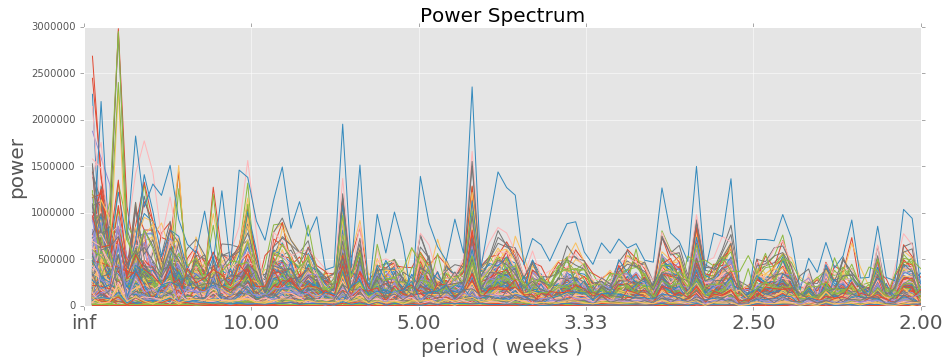

In [333]:
N= 194
sample_rate =1
fft = {}
j = 1
fig=pl.figure(figsize=(15,5))
for i in all_cards: 
    f = np.abs(np.fft.rfft(i))[1:]
    fft[j] = f 
    j += 1
    ax=fig.add_subplot(111)
    #ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate)[1:], (f), 'o', ms=10)
    ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate)[1:], (f), '-')

    ax.set_xticklabels([ "%.2f"%(1/freq) for freq in ax.get_xticks()], fontsize=20)
    pl.xlabel("period ( weeks )", fontsize=20)
    pl.ylabel('power', fontsize=20)

    pl.title("Power Spectrum", fontsize=20)

In [334]:
df_fft = pd.DataFrame(fft)
df_fft

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,2.683790e+06,2.273999e+06,1174.248741,57401.360172,21704.332272,26850.712578,5534.584504,35021.812567,16834.064109,1.876990e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.363594e+06,3.018578e+05,62408.858488,271935.585764,159186.456290,177941.071724,99631.935953,155277.354494,91280.533554,1.591189e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.137938e+05,4.729266e+05,22980.532229,78217.639001,65954.312221,71619.811570,36509.011022,58470.541645,40966.010894,1.305791e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.980161e+06,5.177927e+05,24753.350436,88385.081891,52457.802314,71066.306480,27444.492233,62082.284890,41064.455890,3.085693e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.068934e+06,1.916689e+05,14508.495876,51805.161612,40945.185175,58367.928433,27047.657324,37888.178929,30132.910452,2.997912e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.092865e+05,4.548405e+05,13361.462939,23416.434152,21021.078249,39064.904985,18969.469413,15081.493626,14788.466649,5.916174e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.771162e+05,1.260934e+05,21507.266748,76417.399355,26563.287649,39058.000798,19692.835607,55721.397499,15923.334397,6.309787e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.532301e+05,2.695659e+05,3603.846927,9197.526148,17431.543879,12467.461933,8123.861151,14598.463183,13425.278208,1.460335e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.818343e+05,1.234235e+05,8873.630799,22408.022606,18195.739026,14683.477976,6868.038524,16007.060812,7406.542791,1.219292e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.981807e+05,1.735858e+05,36857.432346,97494.552402,85846.290758,107689.987162,58024.570676,70804.745661,50803.328610,3.876434e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [337]:
1/np.fft.rfftfreq(N, 1.0/sample_rate)

array([          inf,  194.        ,   97.        ,   64.66666667,
         48.5       ,   38.8       ,   32.33333333,   27.71428571,
         24.25      ,   21.55555556,   19.4       ,   17.63636364,
         16.16666667,   14.92307692,   13.85714286,   12.93333333,
         12.125     ,   11.41176471,   10.77777778,   10.21052632,
          9.7       ,    9.23809524,    8.81818182,    8.43478261,
          8.08333333,    7.76      ,    7.46153846,    7.18518519,
          6.92857143,    6.68965517,    6.46666667,    6.25806452,
          6.0625    ,    5.87878788,    5.70588235,    5.54285714,
          5.38888889,    5.24324324,    5.10526316,    4.97435897,
          4.85      ,    4.73170732,    4.61904762,    4.51162791,
          4.40909091,    4.31111111,    4.2173913 ,    4.12765957,
          4.04166667,    3.95918367,    3.88      ,    3.80392157,
          3.73076923,    3.66037736,    3.59259259,    3.52727273,
          3.46428571,    3.40350877,    3.34482759,    3.28813

#### one year is 52 weeks, so 48.5 is the closest periods

In [311]:
1/np.fft.rfftfreq(N, 1.0/sample_rate)[4]

48.5

In [371]:
year_period = np.array(df_fft.iloc[3])
year_period

array([  2.98016064e+06,   5.17792737e+05,   2.47533504e+04,
         8.83850819e+04,   5.24578023e+04,   7.10663065e+04,
         2.74444922e+04,   6.20822849e+04,   4.10644559e+04,
         3.08569256e+05,   3.90094161e+05,   2.82581277e+05,
         1.45520248e+05,   8.28729474e+05,   1.39357756e+05,
         3.69737461e+04,   2.78580342e+05,   7.87646647e+05,
         1.38582919e+05,   1.32454087e+06,   5.23471240e+05,
         4.19674155e+05,   4.63323729e+05,   2.90709525e+05,
         1.83478250e+05,   2.94114799e+00,   5.34393003e+05,
         7.39719510e+05,   6.72420225e+05,   3.10662920e+05,
         2.83353198e+05,   3.45901884e+05,   2.32989658e+06,
         1.72980494e+04,   1.30903209e+05,   1.33041546e+05,
         1.07479201e+05,   2.71566938e+04,   1.86587073e+05,
         9.05175375e+04,   2.55667434e+05,   3.70045949e+05,
         1.72530522e+05,   6.38993327e+05,   5.07092892e+05,
         8.38336288e+05,   4.44729537e+05,   2.30875214e+05,
         2.66078232e+05,

In [372]:
# sort year_period and return a index to say how big it is
indx = np.argsort(year_period)[::-1]
indx

array([  0, 194, 150, 327,  32, 539,  19, 169,  56,  54, 163, 226,  83,
       126,  45,  13,  86,  17, 549, 462,  27, 461, 176,  28, 548, 105,
       171,  43, 540, 311, 535,  26,  20,   1,  87, 221,  44, 186, 158,
        78, 166,  22,  46, 345, 358, 534, 137, 147,  21, 413, 542, 130,
       174, 280,  10, 284, 240, 146, 195, 287,  41, 234,  50,  96, 335,
        31,  80, 400, 167, 168, 258, 135, 122,  85,  29,   9, 183,  52,
       275, 239, 412,  23,  97, 259,  30,  11,  16, 109, 104, 460, 131,
        48, 273,  40,  69, 321, 545, 247, 206, 290,  82, 178, 200,  47,
        95, 124,  49, 543, 292, 256,  93, 389, 219, 110, 210, 165,  51,
       251, 203, 138, 418, 261, 238, 244, 101, 428, 143, 550, 463,  38,
       172,  81, 161,  24, 128, 191, 187,  61, 204, 190,  59,  42, 317,
       117, 193, 334, 228, 323, 451, 177, 337, 289, 458, 202, 149, 121,
       386, 148, 426, 170,  88, 416, 201, 325, 235, 288,  12, 142, 205,
       547, 162,  14,  84,  18, 188, 293, 248,  35, 100, 159,  3

In [378]:
# sort by index, the biggest shows in begining
year_period[indx]

array([  2.98016064e+06,   2.95038893e+06,   2.93189588e+06,
         2.40221858e+06,   2.32989658e+06,   1.35157490e+06,
         1.32454087e+06,   1.22160991e+06,   1.07827315e+06,
         1.03924847e+06,   9.62402772e+05,   8.56387343e+05,
         8.55289835e+05,   8.54001118e+05,   8.38336288e+05,
         8.28729474e+05,   8.22951903e+05,   7.87646647e+05,
         7.44079648e+05,   7.42574148e+05,   7.39719510e+05,
         6.92893194e+05,   6.88689363e+05,   6.72420225e+05,
         6.66155142e+05,   6.62848690e+05,   6.39960569e+05,
         6.38993327e+05,   6.27894267e+05,   5.51122756e+05,
         5.46957097e+05,   5.34393003e+05,   5.23471240e+05,
         5.17792737e+05,   5.12062648e+05,   5.11337110e+05,
         5.07092892e+05,   5.00993659e+05,   4.96694747e+05,
         4.89217300e+05,   4.68972536e+05,   4.63323729e+05,
         4.44729537e+05,   4.44551449e+05,   4.29682830e+05,
         4.24731126e+05,   4.22568171e+05,   4.20621779e+05,
         4.19674155e+05,

### So station  0, 194, 150, 327 are most periodic ones

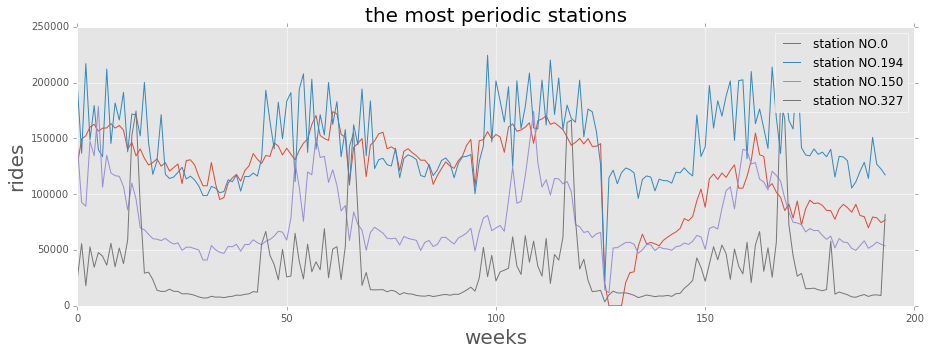

In [382]:
station = [ 0, 194, 150, 327]
pl.figure(figsize=(15,5))
for i in station:
    pl.plot(range(194), all_cards[i], '-', label='station NO.%d'%i)
pl.legend()
pl.xlabel('weeks',fontsize = 20)
pl.ylabel('rides',fontsize = 20)
pl.title('the most periodic stations' ,fontsize = 20)

In [242]:
fft_sum.idxmax()

44

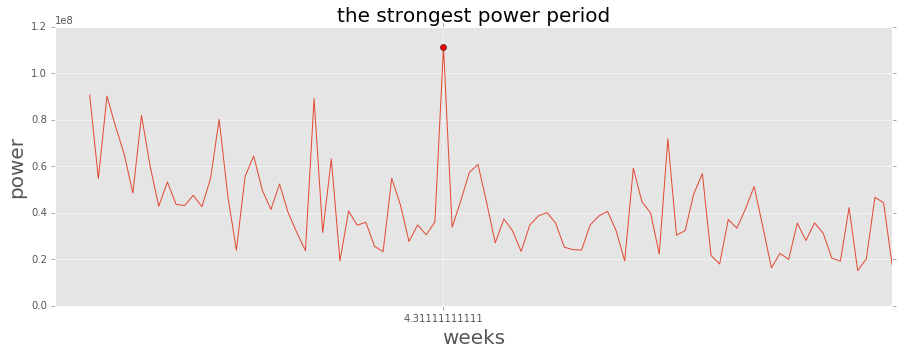

In [264]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
fft_sum = df_fft.sum(axis=1)[3:]
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate)[4:], fft_sum , '-')
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate)[fft_sum.idxmax()+1] , fft_sum.max(),'ro')
#ax.set_xticklabels([ "%.2f"%(1/freq) for freq in ax.get_xticks()] , fontsize=20)
ax.set_xticks([np.fft.rfftfreq(N, 1.0/sample_rate)[fft_sum.idxmax()+1]])
ax.set_xticklabels([1/np.fft.rfftfreq(N, 1.0/sample_rate)[fft_sum.idxmax()+1]])
pl.title('the strongest power period',fontsize = 20)
pl.xlabel('weeks',fontsize = 20)
pl.ylabel('power',fontsize = 20)

### in 4.31 weeks,rideship shows strong periodic pattern, so month is a strong pattern

# Extra Credit

In [391]:
MTAdata.shape

(600, 23, 194)

In [405]:
tots = MTAdata.transpose(2,0,1).reshape(MTAdata.shape[2], MTAdata.shape[1]*MTAdata.shape[0]).T

In [406]:
tots.shape

(13800, 194)

In [426]:
#tots = tots[tots.std(1)>0]

np.nanstd(tots, axis = 1)

array([  3.91400424e+02,   4.36007549e+01,   8.13711673e+00, ...,
         2.14831608e-01,   7.14516263e+02,   5.08678233e+01])

In [428]:
tots = tots[np.nanstd(tots, axis = 1) > 0]

In [429]:
tots.shape

(7660, 194)

In [447]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    ax.plot([K[0],K[-1]], [90,90])
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

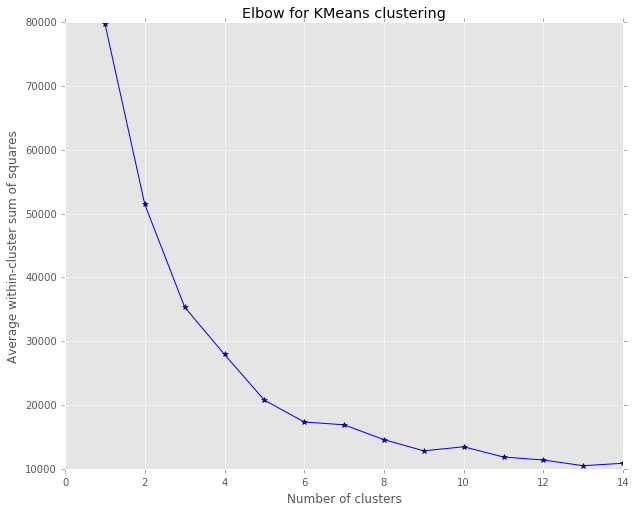

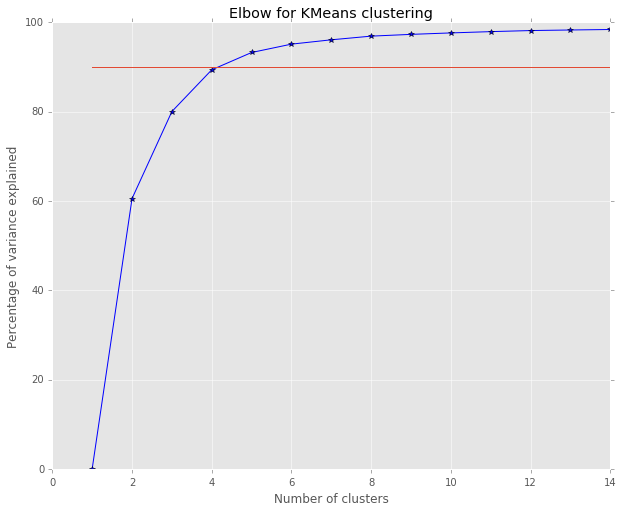

In [448]:
elbow(tots, range(1,15))

### I decide to cluster 4 groups

In [449]:
n=4 # number of clusters
dd=tots #data
tar=y # real target

km=KMeans(n_clusters=n)
res=km.fit(dd)

In [452]:
res.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [430]:
X= tots

In [439]:
print("total variance:{}".format(np.sum(np.var(X,0))))
pca = PCA(194)
pca.fit(X)
#print("variance explained via the first and second components:{}\n".format(pca.explained_variance_))
#print("principal components:\n{}".format(pca.components_))
#pca.explained_variance_ratio_
#np.var(X,0)

total variance:33950952636.2


PCA(copy=True, iterated_power='auto', n_components=194, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [454]:
Xproj = pca.fit_transform(X)

In [456]:
Xproj.shape

(7660, 194)

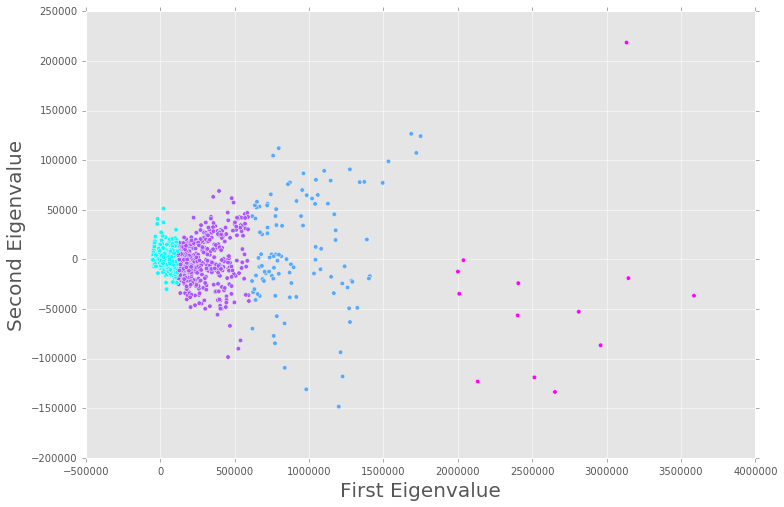

In [460]:
plt.figure(2, figsize=(12, 8))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue',fontsize = 20)
plt.ylabel('Second Eigenvalue' ,fontsize = 20 )
plt.show()